<a href="https://colab.research.google.com/github/BigDataTeam22/PawsomeConciergeCaregiverSelection/blob/main/PawsomeCaregiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAWSOME CONCIERGE - CAREGIVER SELECTION


### Data preprocessing
First we read from the csv file, then we calculate the age and replace Birth_date with it.


In [3]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Read the DataFrame from CSV
df = pd.read_csv('dataset.csv')
df2=df
column_name='birth_date'

#Calculate age
df[column_name] = pd.to_datetime(df[column_name])
current_date = datetime.now()
df['Age'] = current_date.year - df[column_name].dt.year
df.loc[df[column_name].dt.month > current_date.month, 'Age'] -= 1

# Replace Birth_date with age
birth_date_index = df.columns.get_loc(column_name)
df.insert(birth_date_index, 'Age', df.pop('Age'))
df.drop(column_name, axis=1, inplace=True)

df.drop('age', axis=1, inplace=True)

We then apply label encoding to each column and impute missing values with a mean strategy.

- fear_discomfort_management - string(100)
- pet_discipline_approach - string(100)
- dogwalking_tool_choice - string(100)
- dog_reaction_management - string(100)
- dog_reaction_resolution - string(100)
- cat_litter_box_issue_cause - string(100)
- cat_toy_string_chewing_prevention - string(100)
- cat_injury_handling - string(100)
- cat_furniture_scratching_solution - string(100)
- puppy_curiosity_management - string(100)
- Age - int
- experience_with_dog - string(100)
- experience_with_cat - string(100)
- province - string(100)
- class - string(100)

In [ ]:
# Define categorical columns
categorical_columns = list(df)

# Apply label encoding to each column
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

print("Number of rows in data frame: ",len(df.index))
df.sample(n=5)

Number of rows in data frame:  1048576


,fear_discomfort_management,pet_discipline_approach,dogwalking_tool_choice,dog_reaction_management,dog_reaction_resolution,cat_litter_box_issue_cause,cat_toy_string_chewing_prevention,cat_injury_handling,cat_furniture_scratching_solution,puppy_curiosity_management,Age,experience_with_dog,experience_with_cat,province,class
500945,1,3,2,2,1,0,3,1,0,1,35,1,0,1,0
927811,3,2,0,2,2,0,1,0,0,3,0,2,0,0,0
774934,2,3,3,1,0,3,0,1,1,2,22,2,2,0,0
947343,3,2,1,3,1,0,2,0,3,3,10,0,2,1,0
1045830,3,3,3,3,1,1,1,0,1,2,38,0,2,1,0


We split the data into training 80% and testing 20% sets

In [ ]:
classname='class'

y = df[classname]
X = df.drop(classname, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

### k-Nearest Neighbors classifier

In [ ]:
%%time
# Initialize the kNN classifier
k = 5 #number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(X_train, y_train)

CPU times: user 6.46 s, sys: 124 ms, total: 6.58 s
Wall time: 8.02 s


KNeighborsClassifier()

In [ ]:
%%time
# Make predictions on the test data
knn_predictions = knn_classifier.predict(X_test)

CPU times: user 7min 46s, sys: 1 s, total: 7min 47s
Wall time: 7min 51s


In [ ]:
%%time
# Calculate accuracy
knnaccuracy = accuracy_score(y_test, knn_predictions)

print("Accuracy:", knnaccuracy)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(knn_classifier, X, y, cv=5)

# Calculate the mean accuracy across all folds
mean_cv_accuracy = cv_scores.mean() * 100

print("Mean Cross-Validation Accuracy (KNN):", mean_cv_accuracy, "%")

# Calculate precision, recall, and F1-score
print(classification_report(y_test, knn_predictions))

# Calculate precision, recall, and F1-score for the entire model
reportKNN = classification_report(y_test, knn_predictions, output_dict=True)
precision = reportKNN['weighted avg']['precision']
recall = reportKNN['weighted avg']['recall']
f1_score = reportKNN['weighted avg']['f1-score']
support = reportKNN['weighted avg']['support']

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)

Accuracy: 0.8931698106010033
Mean Cross-Validation Accuracy (KNN): 84.35086845106406 %
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    180952
           1       0.44      0.12      0.19      1067
           2       0.67      0.39      0.49     27697

    accuracy                           0.89    209716
   macro avg       0.67      0.49      0.54    209716
weighted avg       0.88      0.89      0.88    209716

Precision: 0.8778847939395142
Recall: 0.8931698106010033
F1-score: 0.8794224682302321
Support: 209716
CPU times: user 46min 15s, sys: 5.87 s, total: 46min 21s
Wall time: 46min 51s


In [ ]:
# Generate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

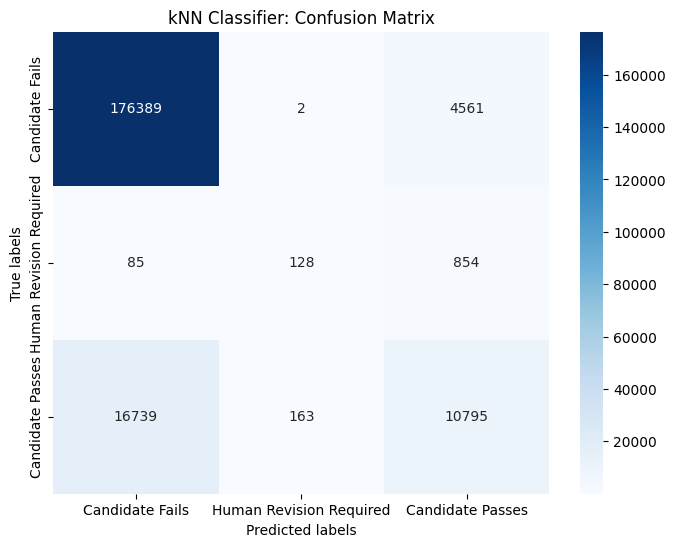

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"],yticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('kNN Classifier: Confusion Matrix')
plt.show()

### Decision Tree Classifier

In [ ]:
%%time
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

CPU times: user 2.55 s, sys: 41.8 ms, total: 2.59 s
Wall time: 2.59 s


DecisionTreeClassifier(max_depth=5)

In [ ]:
# Predict on the test set and calculate accuracy
DT_y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, DT_y_test_pred) * 100

print("Testing Accuracy (Decision Tree):", test_accuracy, "%")

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)

# Calculate the mean accuracy across all folds
mean_cv_accuracy = cv_scores.mean() * 100

print("Mean Cross-Validation Accuracy (Decision Tree):", mean_cv_accuracy, "%")

# Calculate precision, recall, and F1-score for the entire model
report = classification_report(y_test, DT_y_test_pred, output_dict=True,zero_division=0)
print(classification_report(y_test, DT_y_test_pred,zero_division=0))
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
support = report['weighted avg']['support']

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)

Testing Accuracy (Decision Tree): 87.86454061683419 %
Mean Cross-Validation Accuracy (Decision Tree): 77.07432700903132 %
              precision    recall  f1-score   support

           0       0.89      0.98      0.93    180952
           1       0.00      0.00      0.00      1067
           2       0.61      0.26      0.36     27697

    accuracy                           0.88    209716
   macro avg       0.50      0.41      0.43    209716
weighted avg       0.85      0.88      0.85    209716

Precision: 0.8522580583028411
Recall: 0.878645406168342
F1-score: 0.8542253289152635
Support: 209716


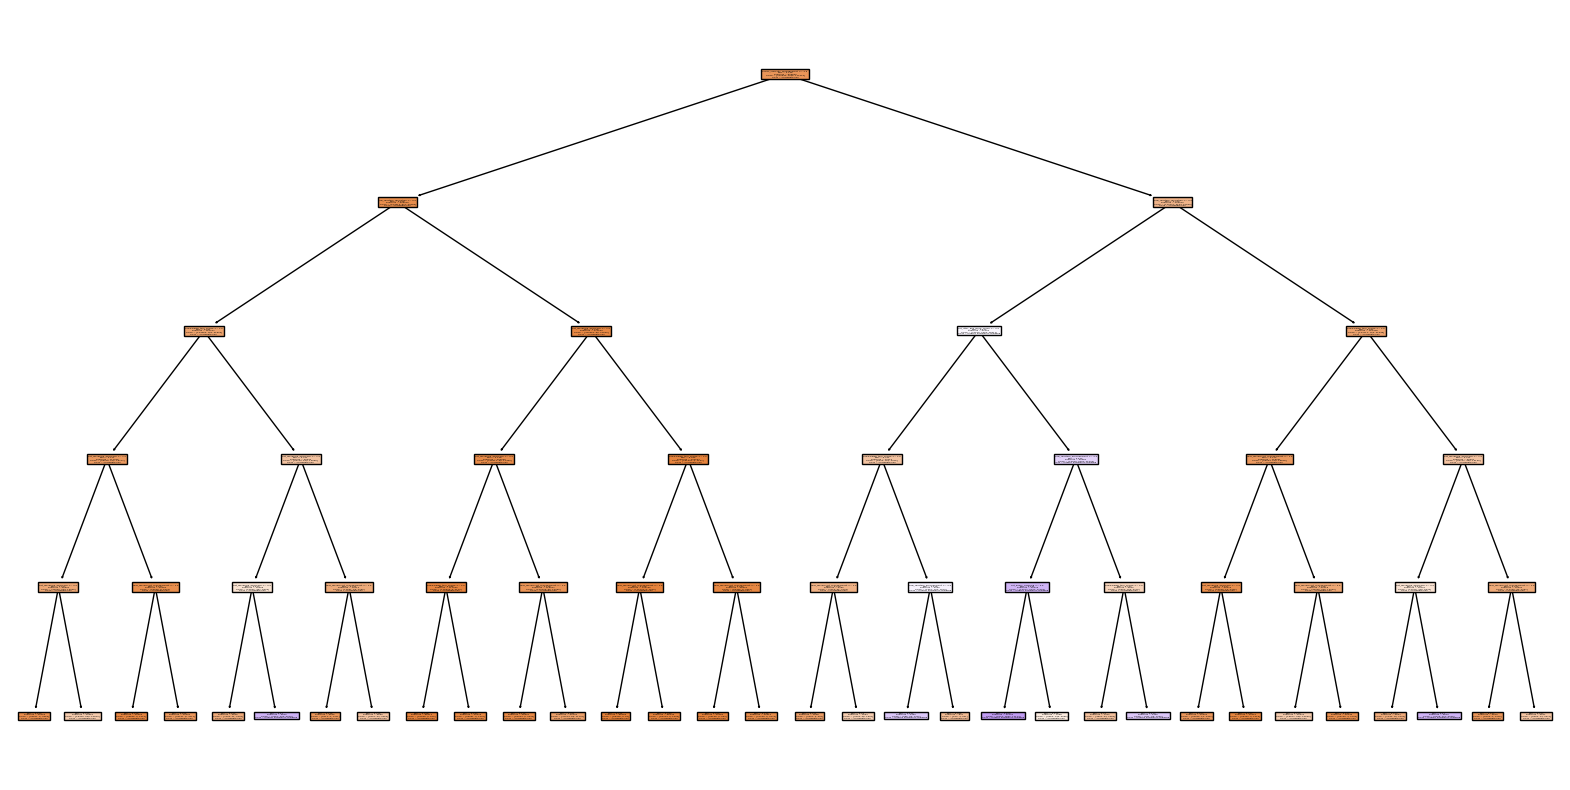

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=df.columns, class_names=label_encoders['class'].classes_, filled=True)
plt.savefig('decision_tree.png', dpi=1000)  # Setting DPI to 300 for higher resolution
plt.show()

In [ ]:
# Generate confusion matrix
DT_conf_matrix = confusion_matrix(y_test, DT_y_test_pred)

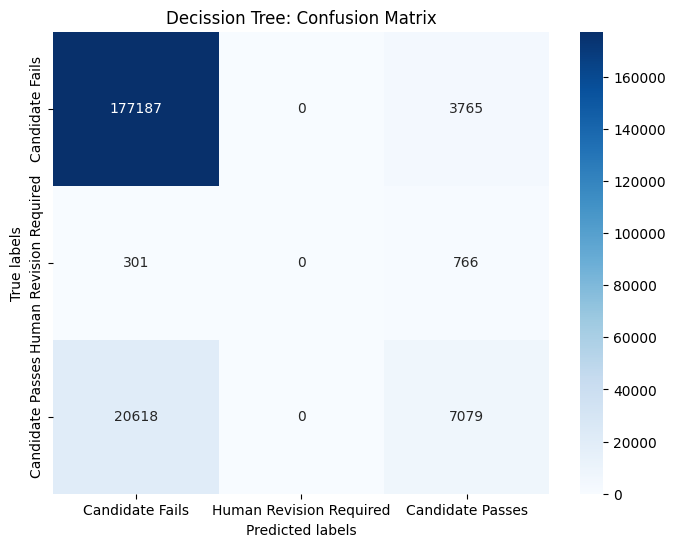

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(DT_conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"],yticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decission Tree: Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
%%time
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

CPU times: user 3min 2s, sys: 899 ms, total: 3min 3s
Wall time: 3min 4s


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
RF_y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, RF_y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Calculate the mean accuracy across all folds
mean_cv_accuracy = cv_scores.mean() * 100

print("Mean Cross-Validation Accuracy (Random Forest):", mean_cv_accuracy, "%")

# Calculate precision, recall, and F1-score
print(classification_report(y_test, RF_y_pred))

# Calculate precision, recall, and F1-score for the entire model
report = classification_report(y_test, RF_y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
support = report['weighted avg']['support']

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)

Accuracy: 0.9713040492857007
Mean Cross-Validation Accuracy (Random Forest): 82.63196294196952 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    180952
           1       0.99      0.31      0.48      1067
           2       0.95      0.83      0.88     27697

    accuracy                           0.97    209716
   macro avg       0.97      0.71      0.78    209716
weighted avg       0.97      0.97      0.97    209716

Precision: 0.9708934056513057
Recall: 0.9713040492857007
F1-score: 0.9695919617304692
Support: 209716


In [ ]:
# Generate confusion matrix
RF_conf_matrix = confusion_matrix(y_test, RF_y_pred)

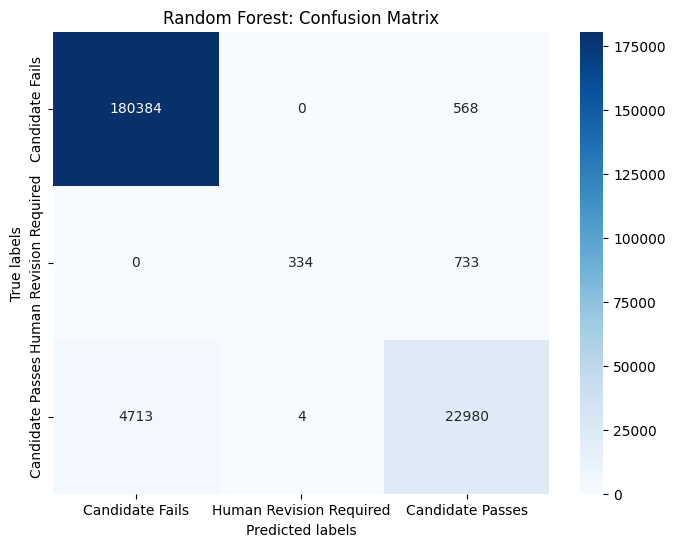

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(RF_conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"],yticklabels=["Candidate Fails","Human Revision Required","Candidate Passes"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest: Confusion Matrix')
plt.show()

### Frequent itemsets

In [1]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [6]:
data_df = pd.read_csv("/content/dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
scenario_columns = [
    'fear_discomfort_management', 'pet_discipline_approach', 'dogwalking_tool_choice',
    'dog_reaction_management', 'dog_reaction_resolution', 'cat_litter_box_issue_cause',
    'cat_toy_string_chewing_prevention', 'cat_injury_handling', 'cat_furniture_scratching_solution',
    'puppy_curiosity_management'
]

data_scenario = data_df[scenario_columns]

# Convert categorical variables to dummy variables using one-hot encoding
data_dummy = pd.get_dummies(data_scenario, drop_first=True)

# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(data_dummy, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
    support                               itemsets
0      0.25         (puppy_curiosity_management_B)
1      0.25         (puppy_curiosity_management_C)
2      0.25         (puppy_curiosity_management_D)
3      0.25  (cat_furniture_scratching_solution_B)
4      0.25  (cat_furniture_scratching_solution_C)
5      0.25  (cat_furniture_scratching_solution_D)
6      0.25                (cat_injury_handling_B)
7      0.25                (cat_injury_handling_C)
8      0.25                (cat_injury_handling_D)
9      0.25  (cat_toy_string_chewing_prevention_B)
10     0.25  (cat_toy_string_chewing_prevention_C)
11     0.25  (cat_toy_string_chewing_prevention_D)
12     0.25         (cat_litter_box_issue_cause_B)
13     0.25         (cat_litter_box_issue_cause_C)
14     0.25         (cat_litter_box_issue_cause_D)
15     0.25            (dog_reaction_resolution_B)
16     0.25            (dog_reaction_resolution_C)
17     0.25            (dog_reaction_resolution_D)
18     0.25 

In [8]:
# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(data_dummy, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
     support                                           itemsets
0     0.2500                     (puppy_curiosity_management_B)
1     0.2500                     (puppy_curiosity_management_C)
2     0.2500                     (puppy_curiosity_management_D)
3     0.2500              (cat_furniture_scratching_solution_B)
4     0.2500              (cat_furniture_scratching_solution_C)
..       ...                                                ...
430   0.0625  (pet_discipline_approach_D, fear_discomfort_ma...
431   0.0625  (fear_discomfort_management_C, puppy_curiosity...
432   0.0625  (fear_discomfort_management_C, puppy_curiosity...
433   0.0625  (puppy_curiosity_management_C, fear_discomfort...
434   0.0625  (puppy_curiosity_management_D, fear_discomfort...

[435 rows x 2 columns]

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [9]:
# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(data_dummy, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
     support                                           itemsets
0     0.2500                     (puppy_curiosity_management_B)
1     0.2500                     (puppy_curiosity_management_C)
2     0.2500                     (puppy_curiosity_management_D)
3     0.2500              (cat_furniture_scratching_solution_B)
4     0.2500              (cat_furniture_scratching_solution_C)
..       ...                                                ...
430   0.0625  (pet_discipline_approach_D, fear_discomfort_ma...
431   0.0625  (fear_discomfort_management_C, puppy_curiosity...
432   0.0625  (fear_discomfort_management_C, puppy_curiosity...
433   0.0625  (puppy_curiosity_management_C, fear_discomfort...
434   0.0625  (puppy_curiosity_management_D, fear_discomfort...

[435 rows x 2 columns]

Association Rules:
                               antecedents  \
0           (puppy_curiosity_management_B)   
1    (cat_furniture_scratching_solution_B)   
2           (puppy_curiosity_ma